<a href="https://colab.research.google.com/github/alexmacharia/deep_learning_projects/blob/main/Pytorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Pytorch
import torch

# Import torchvision for dataset and image transformations
import torchvision
import torchvision.transforms as transforms

# Import optimization library and nn for network graphs
import torch.optim as optim
import torch.nn as nn


print("GPU available: {}".format(torch.cuda.is_available()))

GPU available: True


In [2]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

In [3]:
# Transform to Pytorch Tensors and then normalize values to between -1 and 1
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])

In [4]:
# Load training data and specify transform to use when loading
trainset = torchvision.datasets.MNIST('mnist',
                                      train = True,
                                      download = True,
                                      transform = transform)

# Load test data and specify transform to use when loading
testset = torchvision.datasets.MNIST('mnist',
                                     train = True,
                                     download = True,
                                     transform = transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [5]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([60000, 28, 28])


In [6]:
print(trainset.data[0].shape)
print(trainset.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,  

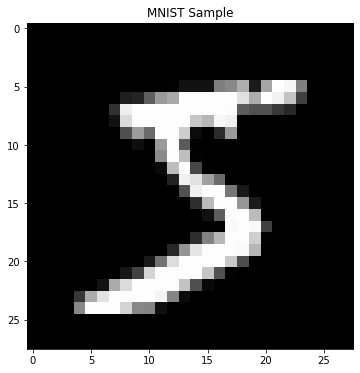

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imgshow(title="", image=None, size=6):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# Convert image to numpy array
image = trainset.data[0].numpy()
imgshow("MNIST Sample", image)
            

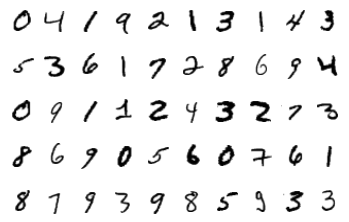

In [8]:
figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images + 1):
  plt.subplot(5, 10, index)
  plt.axis('off')
  plt.imshow(trainset.data[index], cmap='gray_r')

In [9]:
# Prepare data loaders
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=128,
                                          shuffle=True,
                                          num_workers=0)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=128,
                                         shuffle=False,
                                         num_workers=0)


In [10]:
# Create an iterator for the train_loader
dataiter = iter(trainloader)

# Get the first batch
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


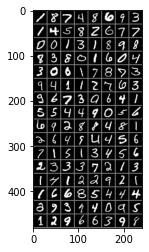

18748693145826770013189883801604300178739411276396739641554490566928848126494456715134562333721314122921166854442939409512966398


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display image
def imshow(img):
  img = img / 2 + 0.5   # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()


# get sample training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

# Print labels
print(''.join('%1s' % labels[j].numpy() for j in range(128)))


In [12]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    # Define layers here
    # First CNN layer using 32 filters of 3x3 size with stride of 1 and padding of 0
    self.conv1 = nn.Conv2d(1, 32, 3)
    # Second layer using 64 filters of 3x3 size with stride 1 and padding of 0
    self.conv2 = nn.Conv2d(32, 64, 3)
    # Max Pool Layer 2 x 2 kernel of stride 2
    self.pool = nn.MaxPool2d(2, 2)
    # First Fully Connected Layer takes output of max pool 12 x 12 x 64 and connects it
    # to a set of 128 nodes
    self.fc1 = nn.Linear(64 * 12 * 12, 128)
    # Second Fully Connected Layer connects the 128 nodes to 10 output nodes (our classes)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    # Here we define our forward propagation sequence
    # Its Conv1 - Relu - Conv2 - Relu - Max Pool - Flatten - FC1 - FC2
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64 * 12 * 12) # Flatten
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

# Create an instance of the model and move it to the CUDA devicec
net = Net()
net.to(device)



Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [13]:
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [14]:
# Import optimizer function
import torch.optim as optim

# Use crossentropy loss as our loss function
criterion = nn.CrossEntropyLoss()

# For optimizer we use SGD with a learning rate of 0.001 and momentum 0.9
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [25]:
epochs = 10

# Create empty arrays to store logs
epochs_log = []
loss_log = []
accuracy_log = []

# Iterate for a specific number of epochs
for epoch in range(epochs):
  print('Starting Epoch: {}...'.format(epoch+1))
  
  # Keep adding/accumulating loss after each mini-batch in running_loss
  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    inputs = inputs.to(device)
    labels = labels.to(device)

    # Clear the gradients before training by setting to zero
    optimizer.zero_grad()

    # Forward prop ==> backprop + optimize
    outputs = net(inputs) # Forward propagation
    loss = criterion(outputs, labels) # Get loss
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 50 == 49:
      correct = 0
      total = 0

      # no_grad will save memory since not required for validation
      with torch.no_grad():
        # Iterate through testloader iterator
        for data in testloader:
          images, labels = data
          images = images.to(device)
          labels = labels.to(device)

          outputs = net(images)
          # Get predictions from max value of predicted output
          _, predicted = torch.max(outputs.data, dim=1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        epoch_num = epoch + 1
        actual_loss = running_loss / 50
        print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
        running_loss = 0.0

  epochs_log.append(epoch_num)
  loss_log.append(actual_loss)
  accuracy_log.append(accuracy)

print('Finished Training')

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 0.157, Test Accuracy = 95.768%
Epoch: 1, Mini-Batches Completed: 100, Loss: 0.136, Test Accuracy = 95.768%
Epoch: 1, Mini-Batches Completed: 150, Loss: 0.143, Test Accuracy = 95.768%
Epoch: 1, Mini-Batches Completed: 200, Loss: 0.142, Test Accuracy = 95.768%
Epoch: 1, Mini-Batches Completed: 250, Loss: 0.147, Test Accuracy = 95.768%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.145, Test Accuracy = 95.768%
Epoch: 1, Mini-Batches Completed: 350, Loss: 0.144, Test Accuracy = 95.768%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.142, Test Accuracy = 95.768%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.137, Test Accuracy = 95.768%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.134, Test Accuracy = 95.768%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.148, Test Accuracy = 95.768%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.154, Test Accuracy = 95.768%
Epoch: 2, Mini-Batches Completed: 200, Loss: 0.1

In [26]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

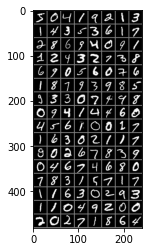

GroundTruth:  50419213143536172869409112432738690560761879398593307498094144604561001716302117902678390467468078315717116302931104920020271864


In [27]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Display images 
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ''.join('%1s' % labels[j].numpy() for j in range(128)))

In [28]:
# Create an instance of the model and move it to the device
net = Net()
net.to(device)

# Load weights from the specified path
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [29]:
test_iter = iter(testloader)

images, labels = next(test_iter)

images = images.to(device)
labels = labels.to(device)

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ''.join('%1s' % predicted[j].cpu().numpy() for j in range(128)))


Predicted:  50419213143536172869409112432738690560761879398583307498094144604561001716302117802678390467468078315717116302931104930020271864


In [30]:
# Test Accuracy

correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')


Accuracy of the network on the 10000 test images: 95.8%


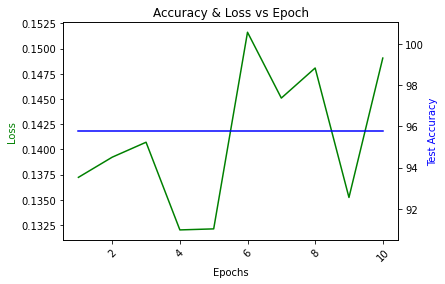

In [31]:
fig, ax1 = plt.subplots()

plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax1.plot(epochs_log, loss_log, 'g-')
ax2.plot(epochs_log, accuracy_log, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()

In [32]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
  for data in testloader:
    images, labels = data

    images = images.to(device)
    labels = labels.to(device)

    outputs = net(images)

    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()

    for i in range(15):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  class_accuracy = 100 * class_correct[i] / class_total[i]
  print(f'Accuracy of {i} : {class_accuracy:.3f}%')



Accuracy of 0 : 96.925%
Accuracy of 1 : 98.506%
Accuracy of 2 : 93.260%
Accuracy of 3 : 94.610%
Accuracy of 4 : 96.073%
Accuracy of 5 : 93.210%
Accuracy of 6 : 96.594%
Accuracy of 7 : 94.452%
Accuracy of 8 : 95.751%
Accuracy of 9 : 95.315%
